In [1]:
# this mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment3/'
FOLDERNAME = 'Net_Visualizer'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# this downloads the CIFAR-10 dataset to your Drive
# if it doesn't already exist.
%cd drive/My\ Drive/$FOLDERNAME

!git config --global user.email 'arjun2000ashok@gmail.com'
!git config --global user.name 'Arjun Ashok'

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

Mounted at /content/drive
/content/drive/My Drive/Net_Visualizer


# Git

In [ ]:
!git add .
!git commit -m 'Added gitignore'
!git push -u origin master

[master 2d261d7] Added gitignore
 2 files changed, 158 insertions(+), 1 deletion(-)
 create mode 100644 .gitignore
 rewrite visualizer.ipynb (97%)
Counting objects: 4, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 1.60 KiB | 547.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/aiarjun/Network-Visualizer.git
   74f84b7..2d261d7  master -> master
Branch 'master' set up to track remote branch 'master' from 'origin'.


# Code testing

## Saliency map

* A saliency map tells us the degree to which each pixel in the image affects the classification score for that image.

* A saliency map tells us the degree to which each pixel in the image affects the classification score for that image. To compute it, we compute the gradient of the unnormalized score corresponding to the correct class (which is a scalar) with respect to the pixels of the image. If the image has shape (3, H, W) then this gradient will also have shape (3, H, W); for each pixel in the image, this gradient tells us the amount by which the classification score will change if the pixel changes by a small amount. To compute the saliency map, we take the absolute value of this gradient, then take the maximum value over the 3 input channels; the final saliency map thus has shape (H, W) and all entries are nonnegative.

[2] Karen Simonyan, Andrea Vedaldi, and Andrew Zisserman. "Deep Inside Convolutional Networks: Visualising Image Classification Models and Saliency Maps", ICLR Workshop 2014.

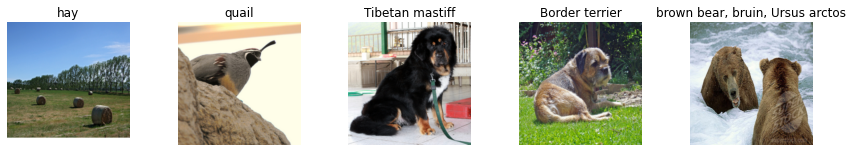

In [4]:
from utils import *
X, y, idx2label = load_imagenet_val(count=5)

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X[i])
    plt.title(idx2label[y[i]])
    plt.axis('off')
plt.gcf().tight_layout()

In [32]:
model = get_pretrained_squeezenet()
X_tensor = torch.cat([preprocess(Image.fromarray(x)) for x in X], dim=0)
y_tensor = torch.LongTensor(y)

model.eval()
X_tensor.requires_grad_()

scores = model(X_tensor)
correct_label_scores = (scores.gather(1, y_tensor.view(-1, 1)).squeeze())
correct_label_scores.backward(torch.FloatTensor([1.0]*correct_label_scores.shape[0]))

saliency, _ = torch.max(X_tensor.grad.data.abs(), axis = 1)

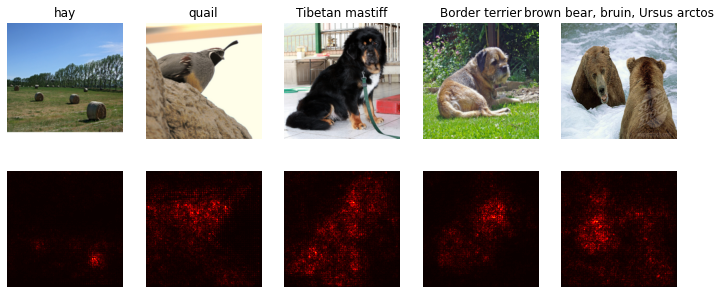

In [33]:
saliency = saliency.numpy()
N = X.shape[0]
for i in range(N):
    plt.subplot(2, N, i + 1)
    plt.imshow(X[i])
    plt.axis('off')
    plt.title(idx2label[y[i]])
    plt.subplot(2, N, N + i + 1)
    plt.imshow(saliency[i], cmap=plt.cm.hot)
    plt.axis('off')
    plt.gcf().set_size_inches(12, 5)
plt.show()